In [1]:
# Import the warnings.

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dframe = pd.read_csv('data.csv')

In [4]:
dframe.shape

(1156, 7)

In [5]:
dframe.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [6]:
# Column-wise information of the dataframe which states the number of null objects and type of the objects

dframe.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


 - The purpose feature of the data frame consists null values and it perfectly makes sense as most of the passengers would not be wwilling to share their purpose as a part of privacy

In [7]:
#Getting the truth table of null (NAN) values in the dataframe 'dframe'

dframe['PURPOSE*'].isnull()


0       False
1        True
2       False
3       False
4       False
        ...  
1151    False
1152    False
1153    False
1154    False
1155     True
Name: PURPOSE*, Length: 1156, dtype: bool

In [8]:
# Summary or analysis of the numberical values of the dataframe

dframe.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MILES*,1156.0,21.115398,359.299007,0.5,2.9,6.0,10.4,12204.7


## Summary of the dataframe

- All the fields exept 'MILES*' are object datatypes
- Most of the trips that are booked (i.e) 75% of the trips are below 10.4 miles with a standard deviation of ~360 miles
- For any dataset the standard deviation could not be 360 miles when the 75% of the distances traveelled are less than 10.4 miles, so there is something wrong with the distance travelled .
- Average trip distance approxiamtes to 21 miles

## Cleaning The dataFrame

- As we are doing the demographic market segment analysis we do not consider the date and time for our market analysis as they are not demographic factors.
- The Demographic market Analysis is the target market analysis based on the demographic factors like age , income , gender ...

In [9]:
#Getting the info for the datasets that are having null / NAN values

dframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [10]:
# Total number of elements that are having null / Nan values

dframe.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

- As only one observation is missing the `END_DATE*` that data can be dropped from the frame

In [11]:
dframe[dframe['END_DATE*'].isnull()]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


- The same observation is missing all the feature values and it is not a data observation rather it is the information of total miles so we exclude it as it is currently of no use to us.

In [12]:
# Removing the observation that contains the total miles value int the dataset

dframe = dframe.drop(labels = 1155,axis = 0)

In [13]:
#Rechek weather the nul values of the dataset are removed.

dframe.isnull().sum()

START_DATE*      0
END_DATE*        0
CATEGORY*        0
START*           0
STOP*            0
MILES*           0
PURPOSE*       502
dtype: int64

- The only data that is missing is teh data of the `PURPOSE*` of the trip ,and that completely makes sense as the passenger may not be willing to share his or her data of the trip (Privacy issues)
- We can igrnore the observations , as we cant replace the value or add a new value to it.

In [14]:
# New Data Frame that doesnt contain any null values and only ued with `PUSPOSE*` and for `CATEGEORY*` we use the dframe

newDframe = dframe[~dframe['PURPOSE*'].isnull()]

In [15]:
newDframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  653 non-null    object 
 1   END_DATE*    653 non-null    object 
 2   CATEGORY*    653 non-null    object 
 3   START*       653 non-null    object 
 4   STOP*        653 non-null    object 
 5   MILES*       653 non-null    float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 40.8+ KB


In [16]:
# Replaceing Nan values in the dataframe with None

dframe = dframe.fillna('None')

In [17]:
# Classify the data by distance

In [18]:
dframe.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MILES*,1155.0,10.56684,21.579106,0.5,2.9,6.0,10.4,310.3


In [19]:
def setCategeory(distance) :
    if distance < 2.9 :
        return 'Small Distance'
    elif distance < 6 :
        return 'Medium Distance'
    elif distance < 10.4  : 
        return 'Large Distance'
    else :
        return 'Super Large Distance'
    
# Assigning the classes based on the percentile it coveres

dframe['driveCategeory'] = dframe['MILES*'].apply(lambda value : setCategeory(value))

        

In [20]:
dframe

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,driveCategeory
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Medium Distance
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,None,Medium Distance
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Medium Distance
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Medium Distance
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Super Large Distance
...,...,...,...,...,...,...,...,...
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting,Small Distance
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site,Medium Distance
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting,Super Large Distance
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site,Large Distance


In [21]:
dframe.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,driveCategeory
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Medium Distance
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,None,Medium Distance
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Medium Distance
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Medium Distance
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Super Large Distance


In [22]:
# Checking the value counts of the 'driveCategeory'

dframe['driveCategeory'].value_counts()

Super Large Distance    305
Medium Distance         288
Small Distance          288
Large Distance          274
Name: driveCategeory, dtype: int64

In [23]:
# Grouping with repect to the 'status'

dframe.groupby(by = dframe['driveCategeory']).count()[['PURPOSE*','CATEGORY*']]

,PURPOSE*,CATEGORY*
driveCategeory,,
Large Distance,274,274
Medium Distance,288,288
Small Distance,288,288
Super Large Distance,305,305


In [24]:
# Calculatiing the top locations where the drivers are getting more rides 
# More traffic locations for starting the journey to drivers and passengers


highStart = dframe.groupby(by = dframe['START*']).count()['MILES*'].sort_values(ascending = False)

# Set the values to ascending to get the the places that have most of the pickup's

In [25]:
# The 5 most trafic locations for drivers to pick up the passengers

highStart.head(6)

START*
Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Durham               37
Name: MILES*, dtype: int64

In [26]:
# Calculatiing the top locations where the drivers are drop their passenger 
# More traffic locations for stoping the journey to drivers and passengers

highStop = dframe.groupby(by = dframe['STOP*']).count()['MILES*'].sort_values(ascending = False)

# Stop locations that are used the most

- The number of `STOP` and `START` are same and just differ by a number is hardly considerable 

In [27]:
# Calculating the number of passengers that are having different start and stop locations

dframe[dframe['START*'] != dframe['STOP*']].shape[0]

867

In [28]:
# Calculating the number of passengers that are having same start and stop locations

dframe[dframe['START*'] == dframe['STOP*']].shape[0]

288

- Although the `START` and `STOP` locations of the locations are same in number and differ in 1 or 2 , But the passengers who board and drop at these locations are not the same .
- Most of the people choose intercity travel than the people who choose travel inside the city and that can be clearly see in the balove calculation.

In [29]:
dframe.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,driveCategeory
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Medium Distance
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,None,Medium Distance
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Medium Distance
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Medium Distance
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Super Large Distance


## Visualizing the Data

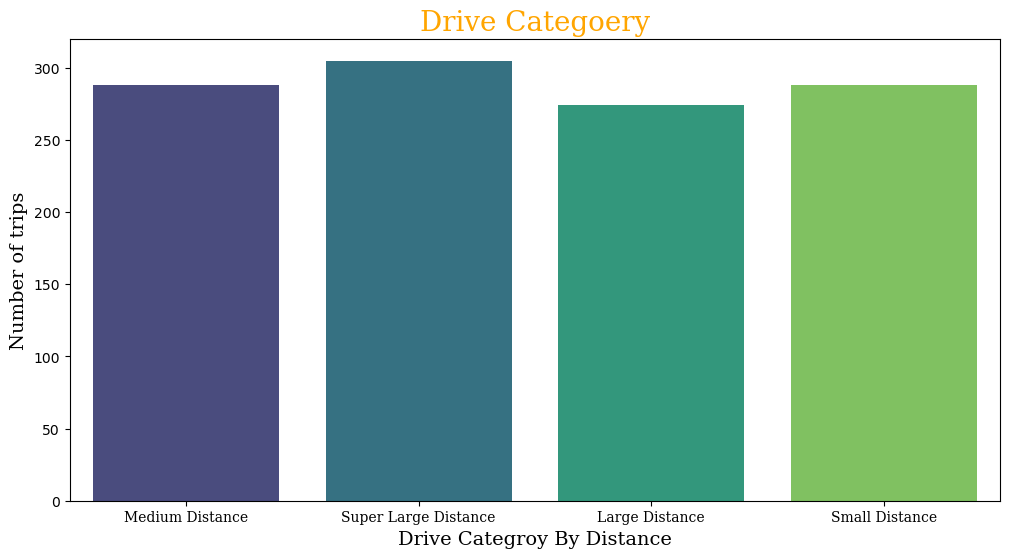

In [30]:
# Plot a graph of size [12,6]
plt.figure(figsize = (12,6))

# Objects to set font
font1 = {'fontname' : 'serif',
        'fontsize' : 14}
font2 = {'fontname' : 'serif',
        'fontsize' : 20,
        'color' : 'orange'}
font3 = {'fontname' : 'serif',
        'fontsize' : 10}

# Plot a count plot
sns.countplot(data = dframe,x = 'driveCategeory',palette='viridis',)

# Assign X label and Y label
plt.xlabel('Drive Categroy By Distance',**font1)
plt.xticks(**font3)
plt.ylabel('Number of trips',**font1);
plt.xticks(**font3)

# Set a title to the plot
plt.title('Drive Categoery',**font2);

### `Inferences : `

- Total number of Small Distance passengers are       : `288`
- Total number of Medium Distance passengers are      : `288`
- Total number of Large Distance passengers are       : `274`
- Total number of Super Large Distance passengers are : `305`

- Total number of observations : `1155`

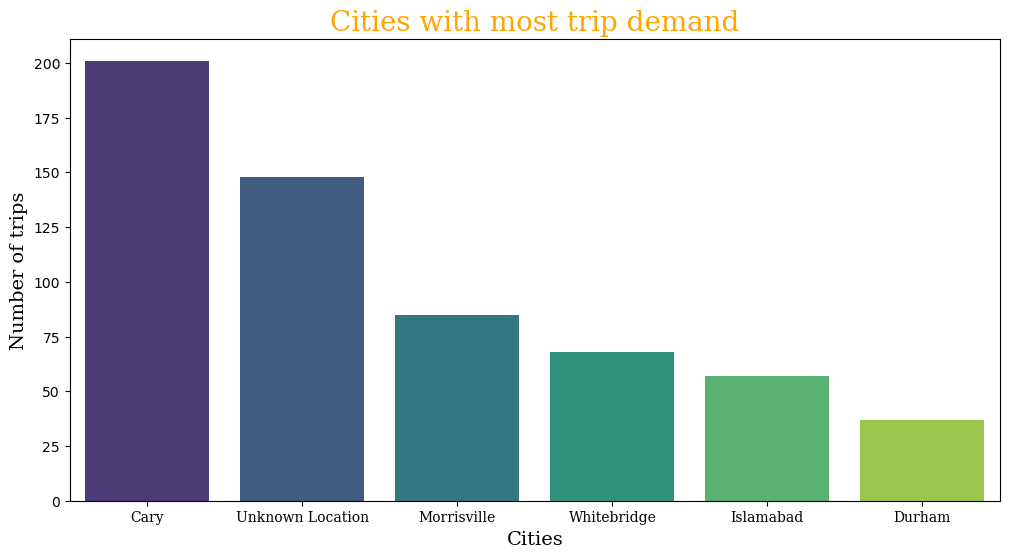

In [31]:
# Plot a graph of size [12,6]
plt.figure(figsize = (12,6))

# Objects to set font
font1 = {'fontname' : 'serif',
        'fontsize' : 14}
font2 = {'fontname' : 'serif',
        'fontsize' : 20,
        'color' : 'orange'}
font3 = {'fontname' : 'serif',
        'fontsize' : 10}

# Plot a count plot
dfr = highStart.reset_index()
sns.barplot(x = dfr['START*'][:6],y = dfr['MILES*'][:6],palette = 'viridis')

# Assign X label and Y label
plt.xlabel('Cities',**font1)
plt.xticks(**font3)
plt.ylabel('Number of trips',**font1);
plt.xticks(**font3)

# Set a title to the plot
plt.title('Cities with most trip demand',**font2);

#### `Inferences : `
- The cities with most of the pickups are : `Cary`,`Morsville`,`Whitebridge`,`Islamabad`,`Durham`,
- The same is also true for the most number of drops so it makes sense on calling them the busiest cities judging by the data available 


In [32]:
newDframe['PURPOSE*'].value_counts()

Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: PURPOSE*, dtype: int64

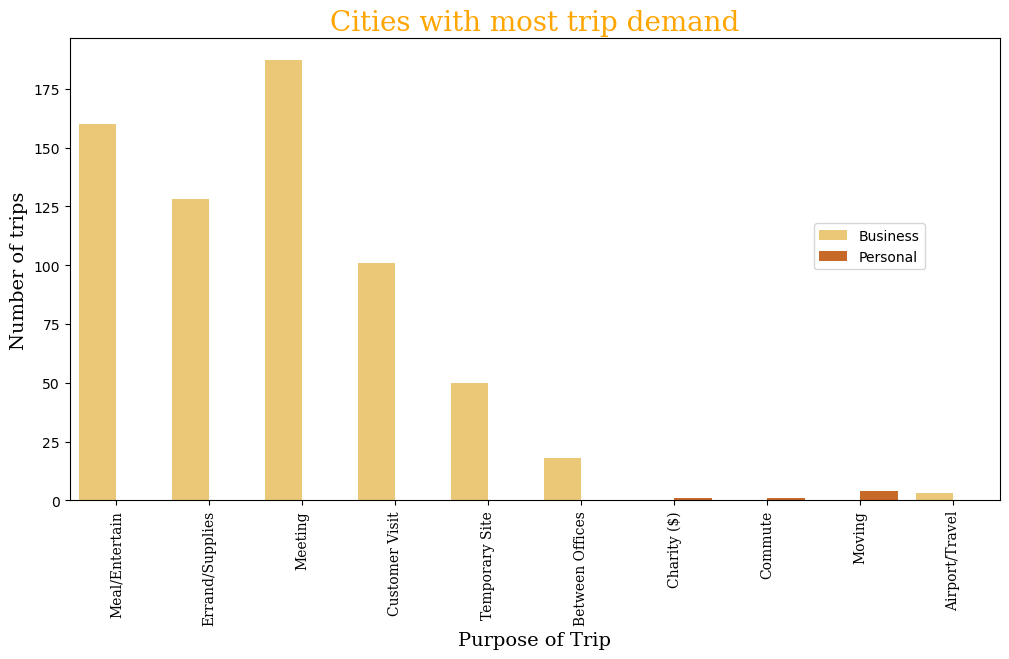

In [33]:
# Plot a graph of size [12,6]
plt.figure(figsize = (12,6))

# Objects to set font
font1 = {'fontname' : 'serif',
        'fontsize' : 14}
font2 = {'fontname' : 'serif',
        'fontsize' : 20,
        'color' : 'orange'}
font3 = {'fontname' : 'serif',
        'fontsize' : 10}

# Plot a count plot
sns.countplot(data = newDframe,x = 'PURPOSE*',palette = 'YlOrBr',hue = 'CATEGORY*')

# Assign X label and Y label
plt.xlabel('Purpose of Trip',**font1)
plt.xticks(**font3)
plt.ylabel('Number of trips',**font1);
plt.xticks(**font3,rotation = 90)
plt.legend(loc = (.8,.5))

# Set a title to the plot
plt.title('Cities with most trip demand',**font2);

### `Inferences : ` 
-  Most of the trips that are in the dataset are business trips as per the data available .
-  We have also seen that almost none of the trips are personal trips could potentially be of two reasons either data not being shared due to privacy reasons or the cab booking is only being done for business purposes .

## Dummy Variable creation for Clustering

In [34]:
# Import required packages

from sklearn.preprocessing import LabelEncoder

# Create a object of label encoder

lc = LabelEncoder()

In [35]:
dframe['PURPOSE*'].value_counts()

None               502
Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: PURPOSE*, dtype: int64

In [36]:
dframe.replace(to_replace = 'NaN',value = 'none')

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,driveCategeory
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Medium Distance
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,None,Medium Distance
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Medium Distance
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Medium Distance
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Super Large Distance
...,...,...,...,...,...,...,...,...
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting,Small Distance
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site,Medium Distance
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting,Super Large Distance
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site,Large Distance


In [37]:
dframe['PURPOSE*'].unique()

array(['Meal/Entertain', 'None', 'Errand/Supplies', 'Meeting',
       'Customer Visit', 'Temporary Site', 'Between Offices',
       'Charity ($)', 'Commute', 'Moving', 'Airport/Travel'], dtype=object)

In [38]:
dframe['PURPOSE*'].value_counts()

None               502
Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: PURPOSE*, dtype: int64

In [39]:
# Creating the dummy variables of the features required 
# Creating dummy variables for. 'Category' and 'purpose'

# By Label Encoding
lc.fit_transform([i for i in dframe['PURPOSE*'].unique()])
dframe['PURPOSE*'] = dframe['PURPOSE*'].map({'Meal/Entertain' : 0,
                                                 'None' : 1,
                                                 'Errand/Supplies' : 2,
                                                 'Meeting' : 3,
                                                 'Customer Visit' : 4,
                                                 'Temporary Site' : 5,
                                                 'Between Offices' : 6,
                                                 'Charity ($)' : 7,
                                                 'Commute' : 8,
                                                 'Moving' : 9,
                                                 'Airport/Travel' : 10})

In [40]:
dframe['driveCategeory'].unique()

array(['Medium Distance', 'Super Large Distance', 'Large Distance',
       'Small Distance'], dtype=object)

In [41]:
dframe['driveCategeory'].value_counts()

Super Large Distance    305
Medium Distance         288
Small Distance          288
Large Distance          274
Name: driveCategeory, dtype: int64

In [42]:
lc.fit_transform([i for i in dframe['driveCategeory'].unique()])
dframe['driveCategeory'] = dframe['driveCategeory'].map({'Medium Distance' : 0, 
                                           'Super Large Distance' : 1, 
                                           'Large Distance' : 2, 
                                           'Small Distance' : 3})

In [46]:
dframe['CATEGORY*'].unique()

array(['Business', 'Personal'], dtype=object)

In [47]:
dframe['CATEGORY*'].value_counts()

Business    1078
Personal      77
Name: CATEGORY*, dtype: int64

In [50]:
lc.fit_transform([i for i in dframe['CATEGORY*']])
dframe['CATEGORY*'] = dframe['CATEGORY*'].map({'Business' : 0, 
                                                               'Personal' : 1})

In [57]:
# Final dataset where scalling and clustering should be done on

finalDframe = dframe[['START*','PURPOSE*','CATEGORY*','driveCategeory']]

# Renaming the names of the features

finalDframe.columns = ['Start Location','Purpose','Category','Distance Classifier']

finalDframe

,Start Location,Purpose,Category,Distance Classifier
0,Fort Pierce,0,0,0
1,Fort Pierce,1,0,0
2,Fort Pierce,2,0,0
3,Fort Pierce,3,0,0
4,Fort Pierce,4,0,1
...,...,...,...,...
1150,Kar?chi,3,0,3
1151,Kar?chi,5,0,0
1152,Unknown Location,3,0,1
1153,Katunayake,5,0,2


#### `Inferences : `
- Clustering algoritm only works on the categorical values , so the derscription of dummy variables becomes important.
- Classification of dummy varibales are made on the following .

1. Dummy categorical values of `Purpose`  - Meal/Entertain : 0, None : 1,
    Errand/Supplies : 2, Meeting : 3,Customer Visit : 4, Temporary Site : 5,       Between Offices : 6,Charity ($) : 7, Commute : 8,Moving : 9,
    Airport/Travel: 10
2. Dummy Categorical values of `Category` - Business : 0 , Purpose : 1
3. Dummy Categorical values of `Distance Classifier` - small Distance : 0,
    medium Distance : 1, large Distance : 2, Super Large Distance : 3  

In [59]:
# Clustering Data description only considered on numberical values of the data frame

finalDframe.describe()

,Purpose,Category,Distance Classifier
count,1155.000000,1155.000000,1155.000000
mean,1.871861,0.066667,1.486580
std,1.585527,0.249552,1.117275
min,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000
50%,1.000000,0.000000,1.000000
75%,3.000000,0.000000,2.000000
max,10.000000,1.000000,3.000000


## Scaling the features down to same scale

In [63]:
# Drop the unwanted data for scaling 

clusteringScaleData = finalDframe.drop('Start Location',axis = 1)

In [65]:
# Importing the libraries and initiate objects

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit the data to the scaler object
scaledData = scaler.fit_transform(clusteringScaleData)

In [71]:
# The final Data stored in the array

scaledData,scaledData.shape

(array([[-1.1811041 , -0.26726124, -1.33111734],
        [-0.55012573, -0.26726124, -1.33111734],
        [ 0.08085264, -0.26726124, -1.33111734],
        ...,
        [ 0.71183101, -0.26726124, -0.43569479],
        [ 1.97378774, -0.26726124,  0.45972777],
        [ 1.97378774, -0.26726124, -0.43569479]]),
 (1155, 3))

In [73]:
# Convert the data from array to Data Frame

scaledData = pd.DataFrame(scaledData)
scaledData.columns = ['Purpose','Category','Distance Classifier']

scaledData.describe()

,Purpose,Category,Distance Classifier
count,1.155000e+03,1.155000e+03,1.155000e+03
mean,2.629931e-16,1.378791e-15,3.678635e-16
std,1.000433e+00,1.000433e+00,1.000433e+00
min,-1.181104e+00,-2.672612e-01,-1.331117e+00
25%,-5.501257e-01,-2.672612e-01,-4.356948e-01
50%,-5.501257e-01,-2.672612e-01,-4.356948e-01
75%,7.118310e-01,-2.672612e-01,4.597278e-01
max,5.128680e+00,3.741657e+00,1.355150e+00


#### `Inferences :`
- If data is not scaled the dummy variables have no scaling or factor that repesents a uniqeness in measure of one feature to oher.
- Every variable is scaled down and lies between [-1,1] and sepends on the type o scaling algorithm we take.

## K-Means Clustering

In [75]:
# Import required libraries for kmeans clustering

from sklearn.cluster import KMeans

### Elbow-curve

In [77]:
k_vals = np.arange(3,15)
wss = []
for i in k_vals:
  kmodel = KMeans(n_clusters = i)
  kmodel.fit(scaledData)
  wss.append([i,kmodel.inertia_])

print(wss)

[[3, 1452.7311251126234], [4, 807.871703896607], [5, 666.26329661523], [6, 587.738658073605], [7, 491.3923789926363], [8, 409.648656053301], [9, 332.47350244264044], [10, 261.4684292623478], [11, 228.02851668391804], [12, 197.08721972073536], [13, 170.3091279865884], [14, 148.06847601680357]]


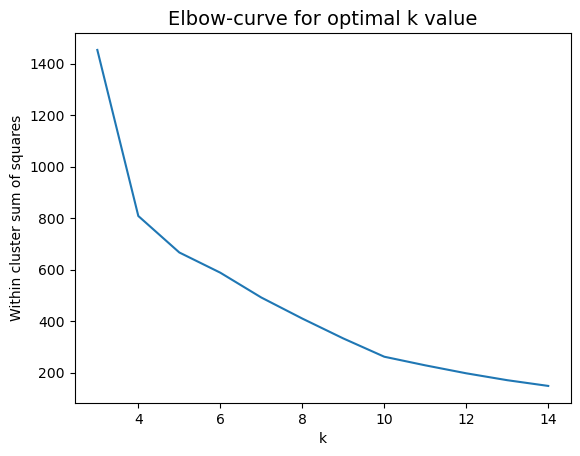

In [78]:
wss = pd.DataFrame(wss, columns = ['k', 'WSS'])

sns.lineplot(x = 'k', y = 'WSS', data = wss)
plt.ylabel('Within cluster sum of squares')
    plt.title('Elbow Curve', fontsize = 14,)
plt.show()

#### `Inferences : `
- The steep points of the Elbow Curve represent the optimal number of clusters be considered.
- We can consider 4 Points in this case as the optimal number of clusters for the dataframe .